#**PRUEBA UNITARIA MODELO: RNN**

In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Paso 2: Cargar el dataset
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Clima_sin_Presion.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Paso 3: Codificar variables categóricas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Paso 4: Definir atributos y etiquetas
X = df.drop("Condition", axis=1)
y = df["Condition"]

# Normalizar atributos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convertir a formato RNN: (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Paso 5: Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Paso 6: Crear el modelo RNN
model = Sequential(name="RNN_Weather_Classifier")
model.add(SimpleRNN(64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "RNN_Weather_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,194 (20.29 KB)

 Trainable params: 5,194 (20.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Paso 7: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3499 - loss: 1.7358 - val_accuracy: 0.3979 - val_loss: 1.5603
Epoch 2/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4059 - loss: 1.5308 - val_accuracy: 0.4564 - val_loss: 1.4443
Epoch 3/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4518 - loss: 1.4303 - val_accuracy: 0.4921 - val_loss: 1.3580
Epoch 4/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4913 - loss: 1.3536 - val_accuracy: 0.5032 - val_loss: 1.3000
Epoch 5/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5124 - loss: 1.3001 - val_accuracy: 0.5208 - val_loss: 1.2570
Epoch 6/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5261 - loss: 1.2583 - val_accuracy: 0.5452 - val_loss: 1.2258
Epoch 7/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5414 - loss: 1.2163 - val_accuracy: 0.5449 - val_loss: 1.1999
Epoch 8/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5439 - los

788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Clases: ['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']


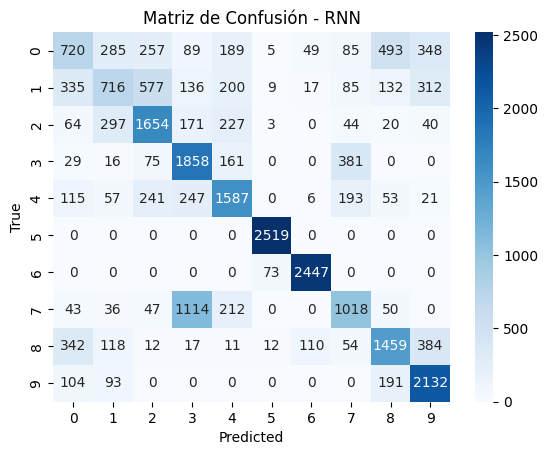

Accuracy: 0.6393618287891416

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.29      0.34      2520
           1       0.44      0.28      0.35      2519
           2       0.58      0.66      0.61      2520
           3       0.51      0.74      0.60      2520
           4       0.61      0.63      0.62      2520
           5       0.96      1.00      0.98      2519
           6       0.93      0.97      0.95      2520
           7       0.55      0.40      0.46      2520
           8       0.61      0.58      0.59      2519
           9       0.66      0.85      0.74      2520

    accuracy                           0.64     25197
   macro avg       0.63      0.64      0.63     25197
weighted avg       0.63      0.64      0.63     25197



In [ ]:
# Paso 8: Evaluación del modelo
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
print("Clases:", label_encoders["Condition"].classes_)
plt.title("Matriz de Confusión - RNN")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))